# Introduction to Python

In [127]:
%%capture 
if 'google.colab' in str(get_ipython()):
  !wget https://raw.githubusercontent.com/fredzett/rmqa/master/utils.py -P local_modules -nc
  import sys
  sys.path.append('local_modules') 

In [128]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import math

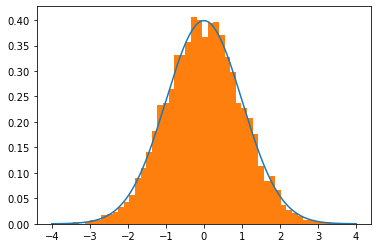

In [45]:
mu = 0
sigma = 1
n = 10000
x = np.linspace(mu - 4 * sigma, mu + 4*sigma,n)
y_true = stats.norm.pdf(x,mu,sigma)
y_sampled = np.random.normal(mu,sigma,n)
plt.plot(x,y_true)
plt.hist(y_sampled, bins=50, density=True);


In [112]:
def choice(data,n):
    return np.random.choice(data,size=n)

def normal(loc,scale,size):
    return np.random.normal(loc,scale,size)

def where(cond,conseq,alt):
    n_x = sum(cond)
    n_y = sum(~cond)
    ret = np.zeros(n_x+n_y)
    loc_x,scale_x = conseq
    loc_y,scale_y = alt
    x = normal(loc_x,scale_x,n_x)
    y = normal(loc_y,scale_y,n_y)
    ret[cond] = x
    ret[~cond] = y
    return ret#np.where(cond,normal(loc_y,scale_x,1),normal(loc_y,scale_y,1))

In [113]:
where(gender=="f",(20000,1),(50000,1))

array([50000.10819332, 20000.24381532, 19999.91700108, ...,
       20000.12212884, 49999.39991033, 50000.92390949])

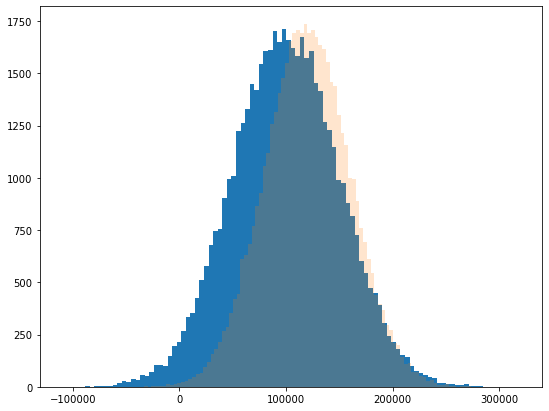

In [124]:
gender = choice(list("mf"), 100_000)
#salary = np.zeros(shape=len(gender))
is_female = gender == "f"
salary = where(gender=="f",(100000,50000),(120000,40000))
data = {"gender":gender,"salary":salary}
df = pd.DataFrame(data)
fig = plt.figure(figsize=(9,7), frameon=False)
plt.hist(df.loc[df["gender"]=="f","salary"], bins=100);
plt.hist(df.loc[df["gender"]=="m","salary"], alpha=0.2, bins=100);

In [51]:
data = {"Gender":sample(("m","f"),100)}

In [53]:
sum(data["Gender"] == "f")

42